Import the libraries

In [1692]:
import pandas as pd
# data analysis and wrangling
from pandas import DataFrame
import numpy as np
import random as rnd
import math
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as stats

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
#from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# pipeline setup
#from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
# cross validation
from sklearn.model_selection import KFold
# Import the evaluation matrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve


from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.metrics import plot_precision_recall_curve

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# evaluation on test data
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# import library for Gradient Boosting

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
#import imbalance for SMOTE
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline

#import pickle
import pickle
import joblib
from joblib import parallel_backend
from sklearn.utils import class_weight

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix


#for NN network
import tensorflow as tf    
from tensorflow import keras  

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, auc 
from sklearn.dummy import DummyClassifier

from keras.utils.all_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras import losses, metrics
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping

# from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Goal: Build a model that can accurately identify auto loan default.

# Overview and Business Understanding

In [1693]:
#import sklearn
#print(sklearn.__version__)

In [1694]:
file_path_1 = ('\\Users\\eggfr\\Flatiron\\Flatiron_phase5cap\\Flatiron_phase5cap\\data\\Auto_Train_Dataset.csv')
file_path_2 = ('\\Users\\eggfr\\Flatiron\\Flatiron_phase5cap\\Flatiron_phase5cap\\data\\Auto_Data_Dictionary.csv')
#file_path_1 = "Auto_Train_Dataset.csv"

In [1695]:
autoloan_raw_df = pd.read_csv(file_path_1,encoding='unicode_escape') 
autoloan_raw_df.head()

C:\Users\eggfr\AppData\Local\Temp\ipykernel_29920\4212711854.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  autoloan_raw_df = pd.read_csv(file_path_1,encoding='unicode_escape')


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [1696]:
autoloan_raw_df = autoloan_raw_df.drop(columns=['ID','Own_House_Age','Social_Circle_Default','Score_Source_1','Score_Source_2','Score_Source_3','Type_Organization'], axis=1)

In [1697]:
autoloan_raw_df['Client_Income'] = pd.to_numeric(autoloan_raw_df['Client_Income'], errors='coerce')
autoloan_raw_df['Credit_Amount'] = pd.to_numeric(autoloan_raw_df['Credit_Amount'], errors='coerce')
autoloan_raw_df['Loan_Annuity'] = pd.to_numeric(autoloan_raw_df['Loan_Annuity'], errors='coerce')
autoloan_raw_df['Age_Days'] = pd.to_numeric(autoloan_raw_df['Age_Days'], errors='coerce')
autoloan_raw_df['Employed_Days'] = pd.to_numeric(autoloan_raw_df['Employed_Days'], errors='coerce')
autoloan_raw_df['Registration_Days'] = pd.to_numeric(autoloan_raw_df['Registration_Days'], errors='coerce')
autoloan_raw_df['ID_Days'] = pd.to_numeric(autoloan_raw_df['ID_Days'], errors='coerce')

Convert the following variabrles into 'object type'. Despite being in integer form, we are going to convert it to object because these are categorical variables.

In [1698]:
autoloan_raw_df['Application_Process_Day'] = autoloan_raw_df['Application_Process_Day'].astype('object')
autoloan_raw_df['Application_Process_Hour'] = autoloan_raw_df['Application_Process_Hour'].astype('object')

Convert the following categorical variabrles into 0 and 1, and it will make it easier to build the pipeline laterb

In [1699]:
autoloan_raw_df['Client_Contact_Work_Tag'].replace({'No': 0, 'Yes': 1}, inplace=True) 
autoloan_raw_df['Client_Permanent_Match_Tag'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [1700]:
autoloan_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118234 non-null  float64
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118219 non-null  float64
 7   Loan_Annuity                117030 non-null  float64
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

# Data Understanding

2.2 Data Undestanding and Identifying Features and Target

Once the data is loaded into a pandas data frame, the next step is identifying which columns represent features and which represent the target. In this project, we will focus on classifying whether loans are defaulted using data collected from a project competition in the Hackathon platform via Kaggle, which can be found at this link. https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon?select=Test_Dataset.csv.

The page provides two datasets, TrainDataset and TestDataset. This model building is to be done on TrainDataset. Test dataset from the link isn't used as ['Default'] data is missing.

There are 121856 total rows of data. There are 39 columns of features. In the first column, respondent_id is a unique and random identifier. The remaining 38 features are described in the data library description.


In [1701]:
autoloan_raw_df.shape

(121856, 33)

Exploratory Data Analysis

Let's examine default status of loan of this data set.

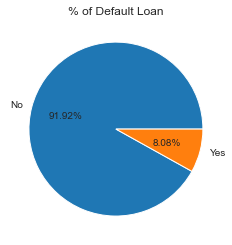

<Figure size 2160x2448 with 0 Axes>

In [1702]:
plt.pie(autoloan_raw_df['Default'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Default Loan')
plt.figure(figsize=(30,34))
plt.show()

Around 8% of loans is defaulted, so it is an imbalanced dataset.

In [1703]:
autoloan_raw_df['Default'].value_counts(normalize=True)

0    0.919208
1    0.080792
Name: Default, dtype: float64

In [1704]:
autoloan_lib_raw_df = pd.read_csv(file_path_2,encoding='unicode_escape') 

Data library description is shown as below.

In [1705]:
# let's take a look of the meaning of each columns
def left_align(df: DataFrame):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'left')])]
    )
    return left_aligned_df
left_align(autoloan_lib_raw_df)

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for the loan for another car (0 means No and 1 means otherwise)
3,Bike_Owned,Any bike owned by client (0 means No and 1 means otherwise)
4,Active_Loan,Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)
5,House_Own,Any house owned by client (0 means No and 1 means otherwise)
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied for the loan


# Visualization of Default status and Client Income and Credit Amount

The scatter plot shows no pattern in default status between client income and credit amount.

# Correlation of between features

[Text(0.5, 1.0, 'Heat Map for All Features')]

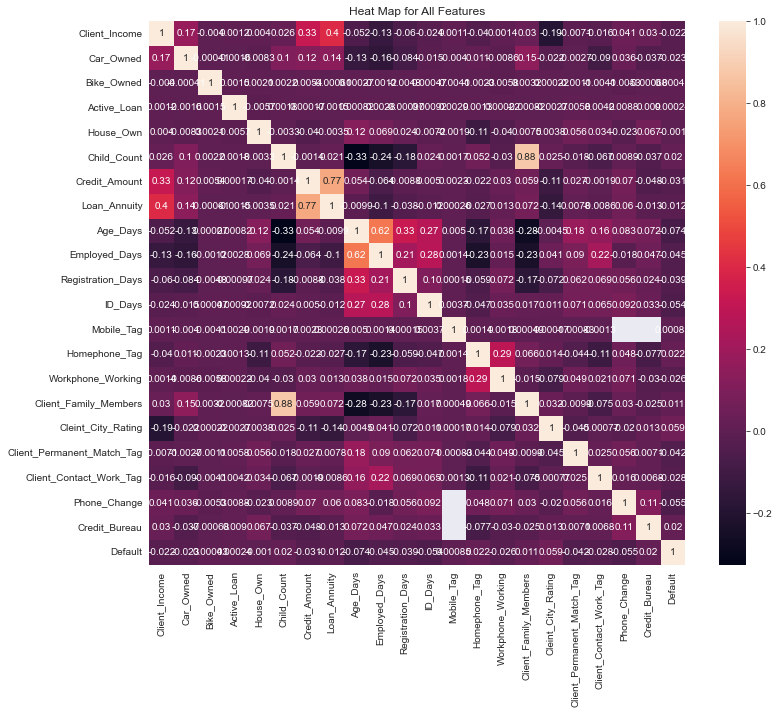

In [1706]:
plt.figure(figsize=(12,10))
sns.heatmap(autoloan_raw_df.corr(),annot = True).set(title='Heat Map for All Features')

Preprocessing the data.

# Visualization of Default Loan by Numerical Features.

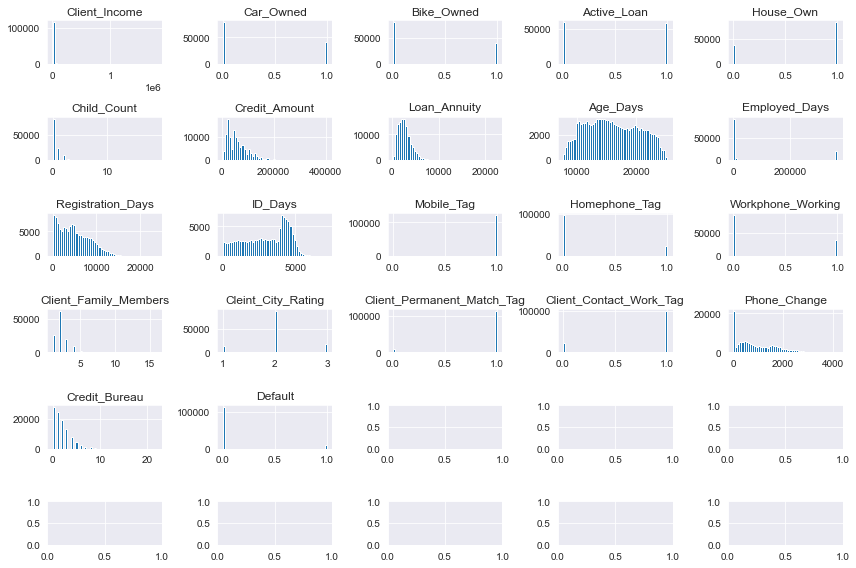

In [1707]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 8))

numericals = [column for column in autoloan_raw_df.select_dtypes(['int', 'float']).columns]

for feature, ax in zip(numericals, axes.flatten()):
    ax.hist(autoloan_raw_df[feature], bins=50)
    ax.set_title(feature)
    
fig.tight_layout()

The histogram shows that outliers may exist with these
 variables:'Client_Income','Credit_Amount','Child_Count','Credit_Bureau','Own_House_Age', and 'Employed_Days'. Let's investagate further with a boxplot for these variables.

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Client_Income'>

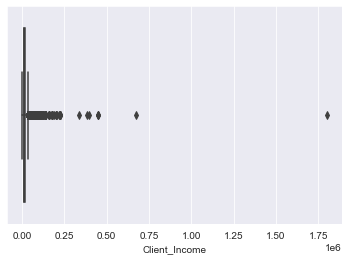

In [1708]:
sns.boxplot(autoloan_raw_df['Client_Income'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Amount'>

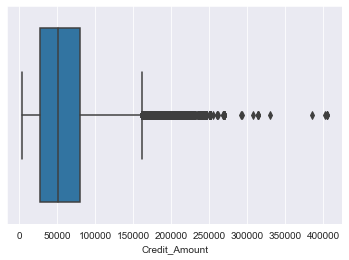

In [1709]:
sns.boxplot(autoloan_raw_df['Credit_Amount'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Child_Count'>

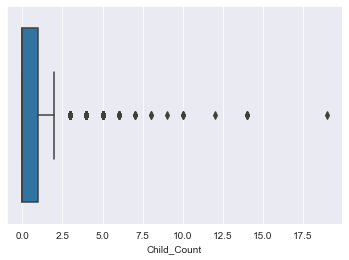

In [1710]:
sns.boxplot(autoloan_raw_df['Child_Count'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Bureau'>

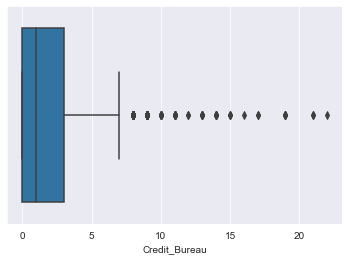

In [1711]:
sns.boxplot(autoloan_raw_df['Credit_Bureau'])

In [1712]:
#sns.boxplot(autoloan_raw_df['Own_House_Age'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employed_Days'>

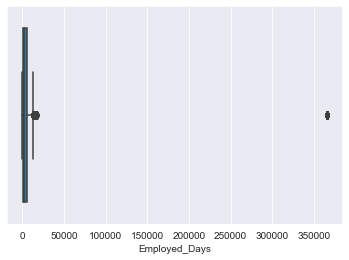

In [1713]:
sns.boxplot(autoloan_raw_df['Employed_Days'])

Let's remove the outliers for these variables.

Client Income

In [1714]:
high_bound = autoloan_raw_df['Client_Income'].quantile(0.995)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Client_Income'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 63000.0
low_bound : 3150.0


In [1715]:
inliers_index = (autoloan_raw_df['Client_Income'] > low_bound) & (autoloan_raw_df["Client_Income"] < high_bound)

print(inliers_index.value_counts())

print(autoloan_raw_df.shape)

print(autoloan_raw_df[inliers_index].shape)

autoloan_raw_df = autoloan_raw_df[inliers_index] # replaces autoloan_raw_df with only the rows that satisfy the thresholds

# alternatives: df.drop

True     117459
False      4397
Name: Client_Income, dtype: int64
(121856, 33)
(117459, 33)


'Credit_Amount'

In [1716]:
high_bound = autoloan_raw_df['Credit_Amount'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Credit_Amount'].quantile(0.001)
print('low_bound :', low_bound)


high_bound : 246384.0
low_bound : 4797.0


In [1717]:
inliers_index = (autoloan_raw_df['Credit_Amount'] > low_bound) & (autoloan_raw_df["Credit_Amount"] < high_bound)

print(inliers_index.value_counts())

print(autoloan_raw_df.shape)

print(autoloan_raw_df[inliers_index].shape)

autoloan_raw_df = autoloan_raw_df[inliers_index] # replaces autoloan_raw_df with only the rows that satisfy the thresholds

# alternatives: df.drop

True     113693
False      3766
Name: Credit_Amount, dtype: int64
(117459, 33)
(113693, 33)


In [1718]:
autoloan_raw_df.shape

(113693, 33)

'Child_Count'

In [1719]:
high_bound = autoloan_raw_df['Child_Count'].quantile(0.99995)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Child_Count'].quantile(0.000)
print('low_bound :', low_bound)


high_bound : 10.970600000000559
low_bound : 0.0


In [1720]:
inliers_index = (autoloan_raw_df["Child_Count"] < high_bound)

print(inliers_index.value_counts())

print(autoloan_raw_df.shape)

print(autoloan_raw_df[inliers_index].shape)

True     110289
False      3404
Name: Child_Count, dtype: int64
(113693, 33)
(110289, 33)


In [1721]:
high_bound = autoloan_raw_df['Credit_Bureau'].quantile(0.9999999999)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Credit_Bureau'].quantile(0.000)
print('low_bound :', low_bound)


high_bound : 21.99999035669316
low_bound : 0.0


In [1722]:
inliers_index = (autoloan_raw_df['Credit_Bureau'] < high_bound)

print(inliers_index.value_counts())

#print(autoloan_raw_df.shape)

#print(autoloan_raw_df[inliers_index].shape)

True     96433
False    17260
Name: Credit_Bureau, dtype: int64


Own_House_Age

In [1723]:
high_bound = autoloan_raw_df['Employed_Days'].quantile(0.908)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Employed_Days'].quantile(0.001)
print('low_bound :', low_bound)
inliers_index = (autoloan_raw_df['Credit_Bureau'] < high_bound)
print(inliers_index.value_counts())

# alternatives: df.drop

high_bound : 365243.0
low_bound : 56.0
True     96434
False    17259
Name: Credit_Bureau, dtype: int64


We will have 113693 rows of data for analysis after outlier removals.

In [1724]:
autoloan_raw_df.shape

(113693, 33)

In [1725]:
# median replacement, train/test split
# 1. split data into train and test
# 2. determine outlier thresholds and replacement values
# 3. apply thresholds and replacement to the train data
# 4. fit a model
# 5. apply the same thresholds and replacement (identified from the train split) on the test data
# 6. predict on test data, evaluate

In [1726]:
#autoloan_raw_df = autoloan_raw_df[(autoloan_raw_df['Client_Income']>=low_bound) & (autoloan_raw_df['Client_Income']<=high_bound)]

With further investigation, 10% of the employed_days is >300000 days. While this may be inaccurate, 10% of the data is significant. Hence, employed_days wont be dropped for outliers.

In [1727]:
high_bound = autoloan_raw_df['Employed_Days'].quantile(0.908)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Employed_Days'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 365243.0
low_bound : 56.0


Removing the outliers

<Figure size 720x720 with 0 Axes>

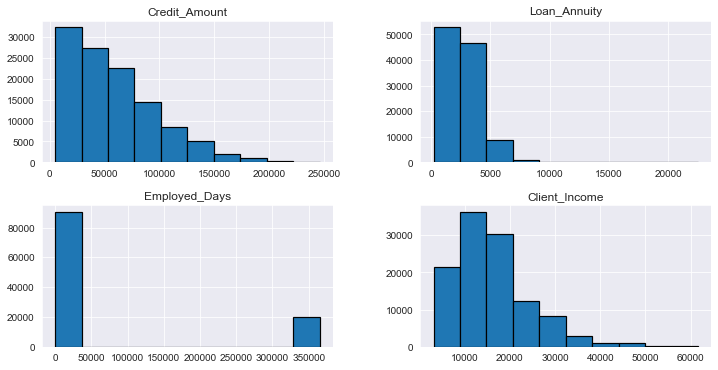

In [1728]:
plt.figure(figsize=(10,10))

cols_to_plot = ['Credit_Amount','Loan_Annuity','Employed_Days','Client_Income']
autoloan_raw_df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

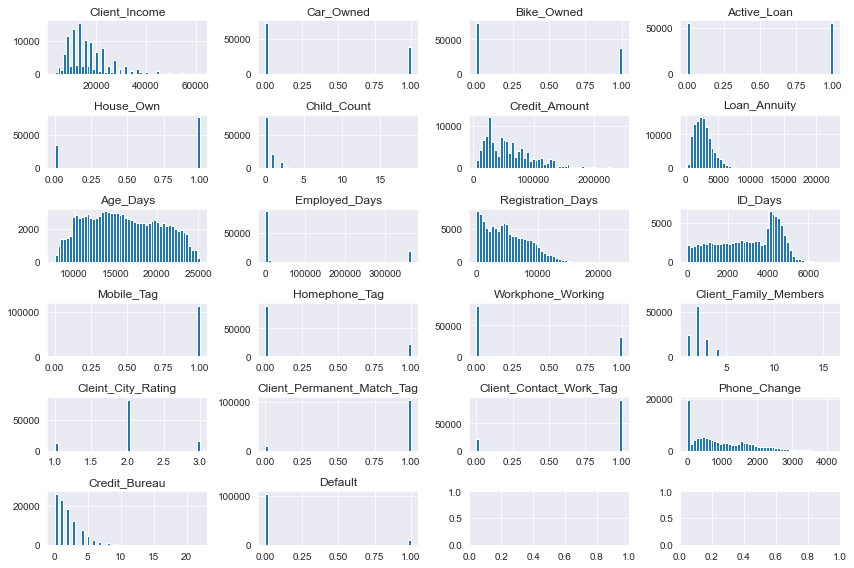

In [1729]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 8))

numericals = [column for column in autoloan_raw_df.select_dtypes(['int', 'float']).columns]

for feature, ax in zip(numericals, axes.flatten()):
    ax.hist(autoloan_raw_df[feature], bins=50)
    ax.set_title(feature)
    
fig.tight_layout()

# Visualization of Default Status and Client Income and Credit Amount

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


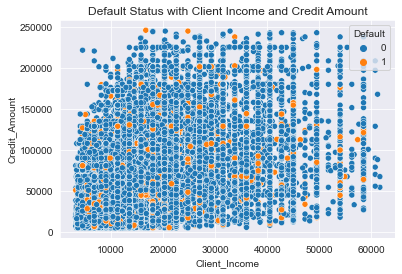

<Figure size 1584x1440 with 0 Axes>

In [1730]:
sns.scatterplot(autoloan_raw_df['Client_Income'], autoloan_raw_df['Credit_Amount'], hue=autoloan_raw_df['Default'])
plt.title('Default Status with Client Income and Credit Amount')
plt.figure(figsize=(22,20))
plt.show()

Correlation of between features.

<AxesSubplot:>

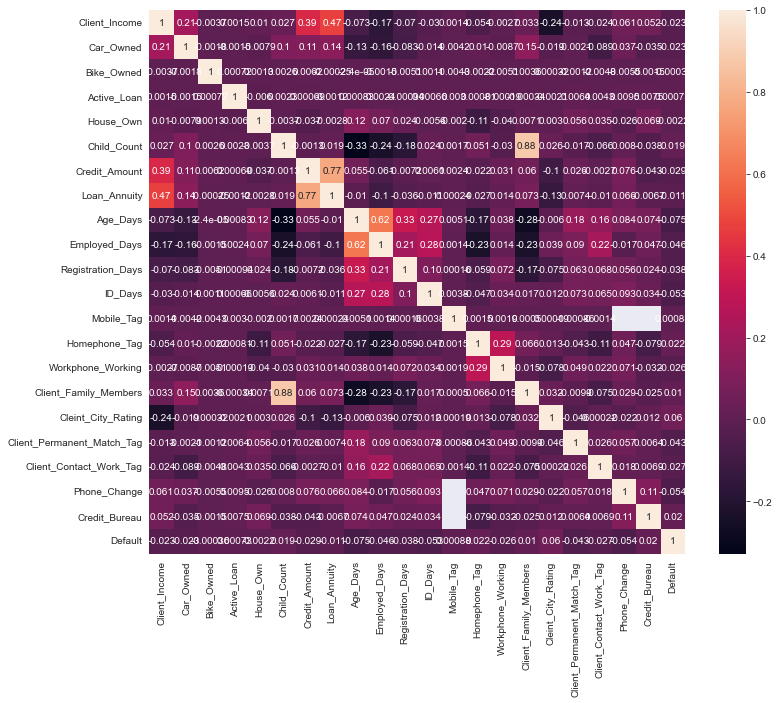

In [1731]:
plt.figure(figsize=(12,10))
sns.heatmap(autoloan_raw_df.corr(),annot = True)

Let's drop some unused feature. ID isnt going to be useful for the analysis. Own_house_Age, Social_Circle_Default','Score_Source_1','Score_Source_3' miss too many data, so they are going to be dropped. Type_Organization and Client_Income_Type has the same categories, and should be similar. We are going to drop Type_Organization to save computational power.

Let's take a look at the target data, and we see that we have an imbalanced dataset.

In [1732]:
#data = pd.read_csv('\\Users\\eggfr\\Flatiron\\Flatiron_phase5_project\\data\\Auto_Train_Dataset.csv')
# data = pd.read_csv('\\Users\\eggfr\\Flatiron\\Flatiron_phase5cap\\Flatiron_phase5cap\\data\\Auto_Train_Dataset.csv')
#data = pd.read_csv("Auto_Train_Dataset.csv")

#data["Default"].value_counts(normalize=True)

Let's seperate our feature variables and target variables, which is default.

In [1733]:
x = autoloan_raw_df.drop(["Default"], axis=1)
y = autoloan_raw_df["Default"]

In [1734]:
x.shape

(113693, 32)

Any data that's missing 3% data would consider random and will be filled with the most frequency in the pipeline.Client_Occupation, Credit_Bureau, ID_Days, Loan_Annuity, and Population_Region_Relative all have more than 3% missing data and will be filled with custom methods.Client_Occupation has 34% missing data. However, we don't want to drop it because it may give us vital information. Missing data will be filled with "other."

# Train Test Split

In the test_train split section, we will assign X as the features and y as the target, which is the ['Default'] variable. 

In [1735]:
def print_cv_scores(pipe, x, y):
    '''
    using given pipeline and prints the training and cross_val scores
    '''
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']
    # This speeds up the processing
    with parallel_backend('threading', n_jobs=-1):
        # Pass in pipe to cross validate along with a feature list; keep standard 5-fold cross-validation
        results = cross_validate(pipe, x, y, cv=5, return_train_score=True, scoring=scoring)
    
    print(f"Training Accuracy: {round(results['train_accuracy'].mean(), 6)}")
    print(f"Cross_Val Accuracy: {round(results['test_accuracy'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro Precision: {round(results['train_precision_macro'].mean(), 6)}")
    print(f"Cross_Val Macro Precision: {round(results['test_precision_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro Recall: {round(results['train_recall_macro'].mean(), 6)}")
    print(f"Cross_Val Macro Recall: {round(results['test_recall_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro F1 Score: {round(results['train_f1_macro'].mean(), 6)}")
    print(f"Cross_Val Macro F1 Score: {round(results['test_f1_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro AUC Score: {round(results['train_roc_auc_ovr'].mean(), 6)}")
    print(f"Cross_Val Macro AUC Score: {round(results['test_roc_auc_ovr'].mean(), 6)}")

In [1736]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1737]:
high_bound = x_train['Employed_Days'].quantile(0.908)
print('high_bound :', high_bound)
low_bound = x_train['Employed_Days'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 365243.0
low_bound : 56.0


In [1738]:
def print_cv_scores(pipe, x, y):
    '''
    using given pipeline and prints the training and cross_val scores
    '''
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']
    # This speeds up the processing
    with parallel_backend('threading', n_jobs=-1):
        # Pass in pipe to cross validate along with a feature list; keep standard 5-fold cross-validation
        results = cross_validate(pipe, x, y, cv=5, return_train_score=True, scoring=scoring)
    
    print(f"Training Accuracy: {round(results['train_accuracy'].mean(), 6)}")
    print(f"Cross_Val Accuracy: {round(results['test_accuracy'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro Precision: {round(results['train_precision_macro'].mean(), 6)}")
    print(f"Cross_Val Macro Precision: {round(results['test_precision_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro Recall: {round(results['train_recall_macro'].mean(), 6)}")
    print(f"Cross_Val Macro Recall: {round(results['test_recall_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro F1 Score: {round(results['train_f1_macro'].mean(), 6)}")
    print(f"Cross_Val Macro F1 Score: {round(results['test_f1_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro AUC Score: {round(results['train_roc_auc_ovr'].mean(), 6)}")
    print(f"Cross_Val Macro AUC Score: {round(results['test_roc_auc_ovr'].mean(), 6)}")

# Create Column Transformer to Preprocess Data

Let's set up a column transformer first. This columntransformer is made up 5 different pipelines. They are first imputed with the data as disccused in the EDA sections. For categorical variables, it will be transformed with either one hot encoder or ordinal encorder. Then, they will be all set up in the columntransformer.  

In [1739]:
#Lets Set up the column transformer
Client_Education_list = ['Junior secondary','Secondary','Graduation dropout','Graduation','Post Grad']
Client_Marital_Status_list = ['D','W','M','S']
ohe_cols = ['Accompany_Client','Client_Income_Type','Client_Gender','Loan_Contract_Type','Client_Housing_Type','Application_Process_Day','Application_Process_Hour']
num_cols = list(x.select_dtypes(['int', 'float']).columns)

nominal_Client_Occupation_pipeline = Pipeline([
    ('onehotimputer',SimpleImputer(strategy = 'constant',fill_value= "Other") ),
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown='ignore')), 
    ('onehotnorm', StandardScaler())])

numeric_pipeline = Pipeline([
    ('numimputer', SimpleImputer(strategy = 'mean')), 
    ('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False,handle_unknown='ignore')), 
    ('onehotnorm', StandardScaler())])

ordinal_Client_Marital_Status_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [Client_Marital_Status_list])),
    ('ordnorm', StandardScaler())])

ordinal_Client_Education_pipeline = Pipeline([
     ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [Client_Education_list])),
     ('ordnorm', StandardScaler())])

ct = ColumnTransformer(
    [ ("ordinalpipe", ordinal_Client_Education_pipeline, ['Client_Education']),
       ("ordinalpipe2", ordinal_Client_Marital_Status_pipeline, ['Client_Marital_Status']),
       ("nominalpipe", nominal_pipeline,ohe_cols),
       ("nominalpipe2", nominal_Client_Occupation_pipeline,['Client_Occupation']),
       ("numpipe", numeric_pipeline, num_cols)])

In [1740]:
ct.fit(x,y)
# get_column_names_from_ColumnTransformer(ct)

ColumnTransformer(transformers=[('ordinalpipe',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordenc',
                                                  OrdinalEncoder(categories=[['Junior '
                                                                              'secondary',
                                                                              'Secondary',
                                                                              'Graduation '
                                                                              'dropout',
                                                                              'Graduation',
                                                                              'Post '
                                                                              'Grad']])),
                                                 ('ordnorm',
                                                  StandardScaler())]),
                                 ['Client_Education']),
                                ('ordinalpipe2',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImput...
                                 ['Client_Income', 'Car_Owned', 'Bike_Owned',
                                  'Active_Loan', 'House_Own', 'Child_Count',
                                  'Credit_Amount', 'Loan_Annuity', 'Age_Days',
                                  'Employed_Days', 'Registration_Days',
                                  'ID_Days', 'Mobile_Tag', 'Homephone_Tag',
                                  'Workphone_Working', 'Client_Family_Members',
                                  'Cleint_City_Rating',
                                  'Client_Permanent_Match_Tag',
                                  'Client_Contact_Work_Tag', 'Phone_Change',
                                  'Credit_Bureau'])])

In [1741]:
#fnames = ct.get_feature_names_out() # gets all the feature names that are created during ct.fit()

In [1742]:
#len(fnames)

In [1743]:
#x_processed = ct.fit_transform(x)

In [1744]:
#x_processed.shape

In [1745]:
#import sklearn
#print(sklearn.__version__)

# `pip install -U scikit-learn` from the terminal to upgrade

In [1746]:
#pd.DataFrame(x_processed,columns=ct.get_feature_names_out())

In [1747]:
#for key, pipeline in ct.named_transformers_.items():
#    print(key)
#    print(pipeline)
#    if isinstance(pipeline, Pipeline):
#        print(pipeline.named_steps)
#        for transform in pipeline:
#            try:
#                print(transform.get_feature_names_out())
#            except:
 #               pass

In [1748]:
#_ = ct.fit_transform(x,y)

#ct.get_feature_names()

# Pipeline and Baseline Model

We use SMOTE to oversample our data. However, SMOTE doesn't work if we only use 1 sklearn pipeline as it doesn't has the fit_transfrom function. We have to break it into 2 different pipelines. One for preprocessing data with column transformer and SMOTE, and the other is for the modeling pipeline. Standscaler is used to scaled the data after SMOTE. PCA is used for feature selection at .9.

In [1749]:
# Need to seperate 2 pipelines
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))
                    ])  #setup preprocessing pipeline

baseline_pipe = Pipeline([
                          
                          ('classifier', DummyClassifier(strategy='most_frequent'))]) #set up model pipeline

In [1750]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

Let's check to see if our y_train data is balanced.

In [1751]:
print(y_resampled.value_counts())

0    83523
1    83523
Name: Default, dtype: int64


That's 50-50 for both classes instead of 92%-8%.

In [1752]:
print_cv_scores(baseline_pipe, x_resampled, y_resampled.values.ravel())

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\l

Training Accuracy: 0.500003
Cross_Val Accuracy: 0.499988
----------------------------------------
Training Macro Precision: 0.250001
Cross_Val Macro Precision: 0.249994
----------------------------------------
Training Macro Recall: 0.5
Cross_Val Macro Recall: 0.5
----------------------------------------
Training Macro F1 Score: 0.333335
Cross_Val Macro F1 Score: 0.333328
----------------------------------------
Training Macro AUC Score: 0.5
Cross_Val Macro AUC Score: 0.5


In [1753]:
 baseline_pipe.fit(x_resampled, y_resampled)  #train the baseline model

Pipeline(steps=[('classifier', DummyClassifier(strategy='most_frequent'))])

We also need to transfrom x_test_data.

In [1754]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test) #transform x_test_data

In [1755]:
y_pred0 = baseline_pipe.predict(x_test_processed) #baseline model prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


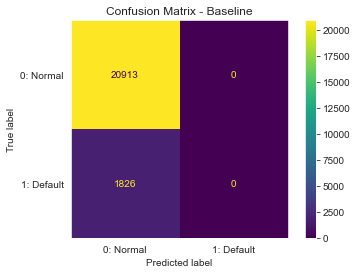

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     20913
           1       0.00      0.00      0.00      1826

    accuracy                           0.92     22739
   macro avg       0.46      0.50      0.48     22739
weighted avg       0.85      0.92      0.88     22739



C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1756]:
#plot the confusion matrix
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(baseline_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Baseline')
plt.show()

baseline_classification_report = classification_report(y_test, y_pred0)
print(baseline_classification_report)

In [1757]:
roc=roc_auc_score(y_test, y_pred0)
acc = accuracy_score(y_test, y_pred0)
prec = precision_score(y_test, y_pred0)
rec = recall_score(y_test, y_pred0)
f1 = f1_score(y_test, y_pred0)

sum_results = pd.DataFrame([['Baseline', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
sum_results

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.919697,0.0,0.0,0.0,0.5


Baseline model achieve 92% accuracy as there is 92% normal cases. However, it doesn't do well as it has 0% in precision and recall.

# Logistic Regression

Let's do a regular Regression Model.

In [1758]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

logreg_pipe = Pipeline([
                        
                        ('logreg', LogisticRegression(random_state=42))]) #set up model pipeline

In [1759]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [1760]:
#x_resampled = pd.DataFrame(x_resampled, columns=pre_pipe.get_feature_names_out())

In [1761]:
#type(x_resampled)

In [1762]:
print_cv_scores(logreg_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 0.635512
Cross_Val Accuracy: 0.634741
----------------------------------------
Training Macro Precision: 0.635667
Cross_Val Macro Precision: 0.634911
----------------------------------------
Training Macro Recall: 0.635512
Cross_Val Macro Recall: 0.634741
----------------------------------------
Training Macro F1 Score: 0.635408
Cross_Val Macro F1 Score: 0.634628
----------------------------------------
Training Macro AUC Score: 0.685821
Cross_Val Macro AUC Score: 0.684679


In [1763]:
logreg_pipe.fit(x_resampled, y_resampled)  #train the logreg model

Pipeline(steps=[('logreg', LogisticRegression(random_state=42))])

In [1764]:
clf = logreg_pipe.named_steps["logreg"]

In [1765]:
clf.coef_.flatten()

array([-2.86886969e-01,  2.92370020e-02,  2.59792620e-04,  6.26480352e-02,
       -9.10896643e-03, -9.51899944e-03,  8.07673274e-03, -3.02557432e-02,
       -5.41118315e-02, -2.70961584e-02, -6.74663606e-02, -1.00242767e-01,
       -3.77878585e-02,  1.22494003e-01,  1.62497875e-02, -6.24027543e-02,
       -4.75584067e-02,  7.47003138e-02, -7.42981116e-02, -4.03672935e-02,
        1.01624493e-01, -1.01624493e-01, -1.84582243e-02, -1.85280338e-02,
        3.74363294e-02, -6.06782555e-03,  1.69906565e-02,  2.16064940e-02,
       -6.38153664e-02, -5.69829355e-03,  2.59543080e-02,  2.72495394e-02,
       -6.42394289e-03,  9.10511039e-03, -1.63416602e-02,  7.73833051e-03,
       -1.32779187e-01,  1.30859938e-03,  3.24884435e-03, -1.71210031e-02,
       -5.70016972e-03,  7.37934667e-03,  6.15923565e-03, -3.84989306e-05,
       -1.49139907e-02,  2.74754868e-02, -1.81645150e-04,  4.95528265e-03,
        1.03919285e-02,  2.02342958e-02,  1.45588094e-02, -1.01916394e-02,
       -5.97181857e-02, -

In [1766]:
# for LogisticRegression, feature importances are just the model coefficients
# access using .coef_
feature_importances = pd.Series(clf.coef_.flatten(), index=pre_pipe.get_feature_names_out().tolist())

# for decision trees or random forest, .coef_ may not be available, use .feature_importances_ instead

In [1767]:
top_feature_importances = pd.concat([feature_importances.sort_values(ascending=False)[:5], feature_importances.sort_values(ascending=False)[-5:]])

<AxesSubplot:>

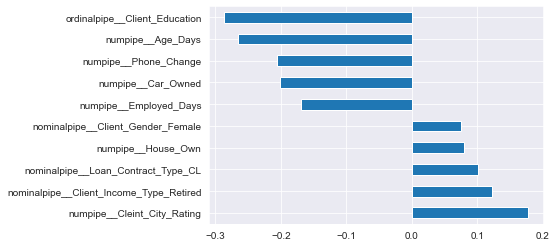

In [1768]:
top_feature_importances.plot.barh()

In [1769]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [1770]:
y_pred1 = logreg_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


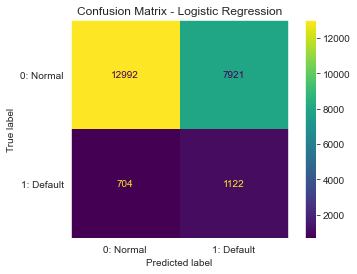

              precision    recall  f1-score   support

           0       0.95      0.62      0.75     20913
           1       0.12      0.61      0.21      1826

    accuracy                           0.62     22739
   macro avg       0.54      0.62      0.48     22739
weighted avg       0.88      0.62      0.71     22739



In [1771]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(logreg_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

baseline_classification_report = classification_report(y_test, y_pred1)
print(baseline_classification_report)

In [1772]:
roc=roc_auc_score(y_test, y_pred1)
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_29920\3551474236.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.919697,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.620696,0.124074,0.614458,0.206459,0.617849


Even though our cross validation has a decent score, we still have a really poor F1 score when we compare to our test set.

In [1773]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [1774]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

logreg_pipe = Pipeline([
                        ('logreg', LogisticRegression(random_state=42))]) #set up model pipeline

Data need to fed into preprocessing pipeline first before GridSearch

In [1775]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test) #preprocessing for x_test

Going to optimize regulation strength and maximum number of iteraion to improve the model performance.

In [1776]:
pipe_grid = {'logreg__C': [10, 15, 20], 
              'logreg__max_iter': [200, 300]
         
            }

model_2_gs_pipe = GridSearchCV(estimator= logreg_pipe, 
                             param_grid=pipe_grid, 
                             cv=3,  # 3-fold cross-validation
                             scoring= "roc_auc",
                             n_jobs=-1,  # Speed up computational time by using all processors
                             verbose=True)  # Print how many folds, candidates, and fits we're solving for    
with parallel_backend('threading', n_jobs=-1):
        model_2_gs_pipe.fit(x_resampled, y_resampled)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [1777]:
#Pickle GridSearchCV object so we don't have to re-run that cell when reloading notebook
with open('model_2_gs_pipe.pkl', 'wb') as f:
     joblib.dump(model_2_gs_pipe, f)

In [1778]:
# Load in pickled object
with open('model_2_gs_pipe.pkl', 'rb') as f:
    model_2_gs_pipe = joblib.load(f)

In [1779]:
optimal_C = model_2_gs_pipe.best_params_['logreg__C']
optimal_max_iter = model_2_gs_pipe.best_params_['logreg__max_iter']
logreg2_pipe = Pipeline([
                        ('logreg', LogisticRegression(C=optimal_C, max_iter=optimal_max_iter,random_state=42))]) #set up logestic regression w the best parameter
logreg2_pipe.fit(x_resampled, y_resampled)

Pipeline(steps=[('logreg',
                 LogisticRegression(C=10, max_iter=200, random_state=42))])

In [1780]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [1781]:
y_pred2 = logreg2_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


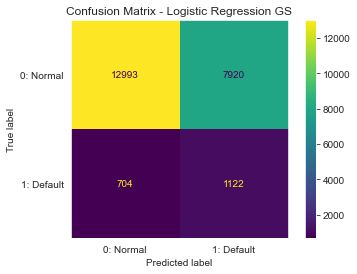

              precision    recall  f1-score   support

           0       0.95      0.62      0.75     20913
           1       0.12      0.61      0.21      1826

    accuracy                           0.62     22739
   macro avg       0.54      0.62      0.48     22739
weighted avg       0.88      0.62      0.71     22739



In [1782]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(logreg2_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Logistic Regression GS')
plt.show()

LogisticRegressionGS_classification_report = classification_report(y_test, y_pred2)
print(LogisticRegressionGS_classification_report)

In [1783]:
roc=roc_auc_score(y_test, y_pred2)
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

results = pd.DataFrame([['Logistic Regression GS', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_29920\3554742584.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.919697,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.620696,0.124074,0.614458,0.206459,0.617849
2,Logistic Regression GS,0.620740,0.124088,0.614458,0.206478,0.617873


There is not much improvement on the logistic regression gridsearch model. We are going to move on to the decision tree model.

# Decision Tree

In [1784]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline   

dt_pipe = Pipeline([
                    
                    ('dt', DecisionTreeClassifier(random_state=42))]) #set up model pipeline  


In [1785]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [1786]:
print_cv_scores(dt_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 1.0
Cross_Val Accuracy: 0.913928
----------------------------------------
Training Macro Precision: 1.0
Cross_Val Macro Precision: 0.924657
----------------------------------------
Training Macro Recall: 1.0
Cross_Val Macro Recall: 0.913928
----------------------------------------
Training Macro F1 Score: 1.0
Cross_Val Macro F1 Score: 0.912783
----------------------------------------
Training Macro AUC Score: 1.0
Cross_Val Macro AUC Score: 0.913928


In [1787]:
dt_pipe.fit(x_resampled, y_resampled)  #train the DT model

Pipeline(steps=[('dt', DecisionTreeClassifier(random_state=42))])

In [1788]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [1789]:
y_pred3 = dt_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


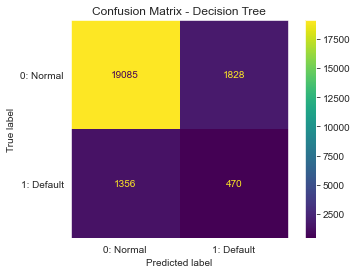

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     20913
           1       0.20      0.26      0.23      1826

    accuracy                           0.86     22739
   macro avg       0.57      0.58      0.58     22739
weighted avg       0.88      0.86      0.87     22739



In [1790]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(dt_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_classification_report = classification_report(y_test, y_pred3)
print(dt_classification_report)

In [1791]:
roc=roc_auc_score(y_test, y_pred3)
acc = accuracy_score(y_test, y_pred3)
prec = precision_score(y_test, y_pred3)
rec = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_29920\1179947049.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.919697,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.620696,0.124074,0.614458,0.206459,0.617849
2,Logistic Regression GS,0.620740,0.124088,0.614458,0.206478,0.617873
3,Decision Tree,0.859976,0.204526,0.257393,0.227934,0.584992


In [1792]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [1793]:
pipe_grid = {    
              'dt__min_samples_leaf': [5, 6, 7], #minimum number of samples required in the leaf mode
              'dt__max_features': [10, 20, 30]} #number of features to decide on next split to prevent overfittinh
            
model_dt_gs_pipe = GridSearchCV(estimator= dt_pipe, 
                             param_grid=pipe_grid, 
                             cv=5,  # 5-fold cross-validation
                             scoring= "roc_auc",
                             n_jobs=-1,  # Speed up computational time by using all processors
                             verbose=True)  # Print how many folds, candidates, and fits we're solving for
with parallel_backend('threading', n_jobs=-1):
    model_dt_gs_pipe.fit(x_resampled, y_resampled)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [1794]:
##Pickle GridSearchCV object so we don't have to re-run that cell when reloading notebook
with open('model_dt_gs_pipe.pkl', 'wb') as f:
     joblib.dump(model_dt_gs_pipe, f)

In [1795]:
with open('model_dt_gs_pipe.pkl', 'rb') as f:
    model_dt_gs_pipe = joblib.load(f)

In [1796]:
optimal_min_samples_leaf = model_dt_gs_pipe.best_params_['dt__min_samples_leaf']
optimal_max_features = model_dt_gs_pipe.best_params_['dt__max_features']
dt2_pipe = Pipeline([
                        ('dt',DecisionTreeClassifier(min_samples_leaf = optimal_min_samples_leaf, max_features=optimal_max_features, random_state=42))]) #set up logestic regression w the best parameter
dt2_pipe.fit(x_resampled, y_resampled)

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(max_features=30, min_samples_leaf=7,
                                        random_state=42))])

In [1797]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [1798]:
y_pred4 = dt_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


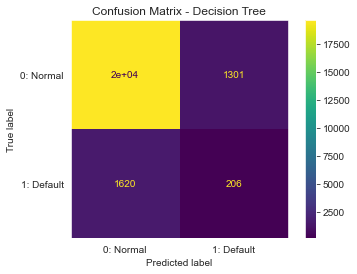

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     20913
           1       0.20      0.26      0.23      1826

    accuracy                           0.86     22739
   macro avg       0.57      0.58      0.58     22739
weighted avg       0.88      0.86      0.87     22739



In [1799]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(dt2_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_classification_report = classification_report(y_test, y_pred4)
print(dt_classification_report)

In [1800]:
roc=roc_auc_score(y_test, y_pred4)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

results = pd.DataFrame([['Decision Tree GS', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_29920\3459039034.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.919697,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.620696,0.124074,0.614458,0.206459,0.617849
2,Logistic Regression GS,0.620740,0.124088,0.614458,0.206478,0.617873
3,Decision Tree,0.859976,0.204526,0.257393,0.227934,0.584992
4,Decision Tree GS,0.859976,0.204526,0.257393,0.227934,0.584992


# Random forest

In [1801]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

rf_pipe = Pipeline([
                     
                     ('rf_clf', RandomForestClassifier(random_state=42))]) #set up model pipeline

In [1802]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [1803]:
print_cv_scores(rf_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 1.0
Cross_Val Accuracy: 0.96243
----------------------------------------
Training Macro Precision: 1.0
Cross_Val Macro Precision: 0.972023
----------------------------------------
Training Macro Recall: 1.0
Cross_Val Macro Recall: 0.96243
----------------------------------------
Training Macro F1 Score: 1.0
Cross_Val Macro F1 Score: 0.9612
----------------------------------------
Training Macro AUC Score: 1.0
Cross_Val Macro AUC Score: 0.989778


In [1804]:
rf_pipe.fit(x_resampled, y_resampled)  #train the RF model

Pipeline(steps=[('rf_clf', RandomForestClassifier(random_state=42))])

In [1805]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)# train prepipeline get balanced data for test

In [1806]:
y_pred4 = rf_pipe.predict(x_test_processed) # rf prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


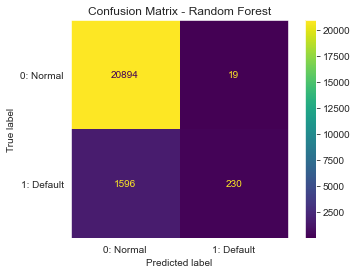

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20913
           1       0.92      0.13      0.22      1826

    accuracy                           0.93     22739
   macro avg       0.93      0.56      0.59     22739
weighted avg       0.93      0.93      0.90     22739



In [1807]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(rf_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Random Forest')
plt.show()

rf_classification_report = classification_report(y_test, y_pred4)
print(rf_classification_report)

In [1808]:
roc=roc_auc_score(y_test, y_pred4)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

results = pd.DataFrame([['Random Forrest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_29920\2163201458.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.919697,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.620696,0.124074,0.614458,0.206459,0.617849
2,Logistic Regression GS,0.620740,0.124088,0.614458,0.206478,0.617873
3,Decision Tree,0.859976,0.204526,0.257393,0.227934,0.584992
4,Decision Tree GS,0.859976,0.204526,0.257393,0.227934,0.584992
5,Random Forrest,0.928977,0.923695,0.125958,0.221687,0.562525


# AdaBoost

In [1809]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

ab_pipe = Pipeline([                
                      ('ab_clf', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42))]) #set up model pipeline

In [1810]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [1811]:
print_cv_scores(ab_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 1.0
Cross_Val Accuracy: 0.913719
----------------------------------------
Training Macro Precision: 1.0
Cross_Val Macro Precision: 0.924351
----------------------------------------
Training Macro Recall: 1.0
Cross_Val Macro Recall: 0.913719
----------------------------------------
Training Macro F1 Score: 1.0
Cross_Val Macro F1 Score: 0.912574
----------------------------------------
Training Macro AUC Score: 1.0
Cross_Val Macro AUC Score: 0.913719


In [1812]:
ab_pipe.fit(x_resampled, y_resampled)  #train the AB model

Pipeline(steps=[('ab_clf',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                    random_state=42))])

In [1813]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)# train prepipeline get balanced data for test

In [1814]:
y_pred5 = ab_pipe.predict(x_test_processed)

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


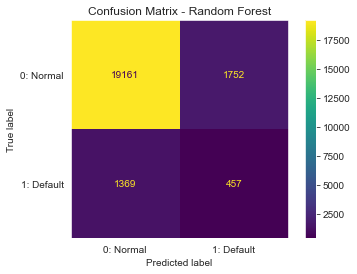

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     20913
           1       0.21      0.25      0.23      1826

    accuracy                           0.86     22739
   macro avg       0.57      0.58      0.58     22739
weighted avg       0.87      0.86      0.87     22739



In [1815]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(ab_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Random Forest')
plt.show()

ab_classification_report = classification_report(y_test, y_pred5)
print(ab_classification_report)

In [1816]:
roc=roc_auc_score(y_test, y_pred5)
acc = accuracy_score(y_test, y_pred5)
prec = precision_score(y_test, y_pred5)
rec = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)

results = pd.DataFrame([['Ada Boost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_29920\2187843560.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.919697,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.620696,0.124074,0.614458,0.206459,0.617849
2,Logistic Regression GS,0.620740,0.124088,0.614458,0.206478,0.617873
3,Decision Tree,0.859976,0.204526,0.257393,0.227934,0.584992
4,Decision Tree GS,0.859976,0.204526,0.257393,0.227934,0.584992
5,Random Forrest,0.928977,0.923695,0.125958,0.221687,0.562525
6,Ada Boost,0.862747,0.206881,0.250274,0.226518,0.583249


ADA-GS

In [1817]:
pipe_grid = { 
            'ab_clf__n_estimators' : [10, 50, 100],       
            'ab_clf__learning_rate' : [ 0.001, 0.01, 0.1]  
            }
model_ab_gs_pipe = GridSearchCV(estimator= ab_pipe, 
                             param_grid=pipe_grid, 
                             cv=5,  # 5-fold cross-validation
                             scoring= "roc_auc",
                             n_jobs=-1,  # Speed up computational time by using all processors
                             verbose=True)  # Print how many folds, candidates, and fits we're solving for
with parallel_backend('threading', n_jobs=-1):
     model_ab_gs_pipe.fit(x_resampled, y_resampled)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [1818]:
with open('model_ab_gs_pipe.pkl', 'wb') as f:
     joblib.dump(model_ab_gs_pipe, f)

In [1819]:
with open('model_ab_gs_pipe.pkl', 'rb') as f:
    model_ab_gs_pipe = joblib.load(f)

In [1820]:
optimal_n_estimators = model_ab_gs_pipe.best_params_['ab_clf__n_estimators']
optimal_learning_rate = model_ab_gs_pipe.best_params_['ab_clf__learning_rate']
ab2_pipe = Pipeline([   ('ab_clf', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators = optimal_n_estimators, learning_rate=optimal_learning_rate,random_state=42))
                        ]) #set up logestic regression w the best parameter
ab2_pipe.fit(x_resampled, y_resampled)

Pipeline(steps=[('ab_clf',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                    learning_rate=0.001, n_estimators=10,
                                    random_state=42))])

In [1821]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [1822]:
y_pred6 = ab2_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


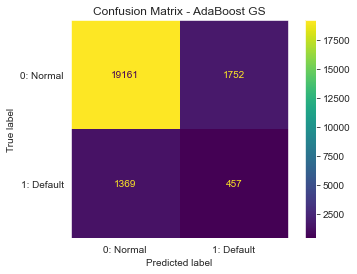

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     20913
           1       0.21      0.25      0.23      1826

    accuracy                           0.86     22739
   macro avg       0.57      0.58      0.58     22739
weighted avg       0.87      0.86      0.87     22739



In [1823]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(ab2_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - AdaBoost GS')
plt.show()

ab2_classification_report = classification_report(y_test, y_pred6)
print(ab2_classification_report)

In [1824]:
roc=roc_auc_score(y_test, y_pred6)
acc = accuracy_score(y_test, y_pred6)
prec = precision_score(y_test, y_pred6)
rec = recall_score(y_test, y_pred6)
f1 = f1_score(y_test, y_pred6)

results = pd.DataFrame([['Ada Boost GS', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_29920\3593632169.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.919697,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.620696,0.124074,0.614458,0.206459,0.617849
2,Logistic Regression GS,0.620740,0.124088,0.614458,0.206478,0.617873
3,Decision Tree,0.859976,0.204526,0.257393,0.227934,0.584992
4,Decision Tree GS,0.859976,0.204526,0.257393,0.227934,0.584992
5,Random Forrest,0.928977,0.923695,0.125958,0.221687,0.562525
6,Ada Boost,0.862747,0.206881,0.250274,0.226518,0.583249
7,Ada Boost GS,0.862747,0.206881,0.250274,0.226518,0.583249


In [1825]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

In [1826]:
x_resampled_clean = np.asarray(x_resampled).astype(np.float32)
x_test_processed_clean = np.asarray(x_test_processed).astype(np.float32)
y_resampled_clean = np.asarray(y_resampled).astype(np.float32)
y_test_clean = np.asarray(y_test).astype(np.float32)

In [1827]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [1828]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [1829]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'train_loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

Neural Network_baseline

In [1830]:
model_nn_base = Sequential()
model_nn_base.add(Dense(16, input_shape=(99,), activation='relu')),
model_nn_base.add(Dense(1, activation='sigmoid'))
#Compile model
model_nn_base.compile(
                loss='binary_crossentropy', 
                optimizer= keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
model_nn_base.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                1600      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 1,617
Trainable params: 1,617
Non-trainable params: 0
_________________________________________________________________


In [1831]:
# terminate training if doesnt improve on specified min_delta for 5 epochs
earlystopper = EarlyStopping(monitor='accuracy', min_delta = 1e-2, patience = 5)

In [1832]:
results_nn_base = model_nn_base.fit(
                    x=x_resampled_clean, 
                    y=y_resampled_clean, 
                    epochs=10, 
                    batch_size=5, 
                    validation_split=0.15,
                    callbacks = [earlystopper])

Epoch 1/10
28398/28398 [==============================] - 86s 3ms/step - loss: 0.6010 - tp: 29919.0000 - fp: 17937.0000 - tn: 65586.0000 - fn: 28547.0000 - accuracy: 0.6726 - precision: 0.6252 - recall: 0.5117 - auc: 0.7232 - prc: 0.6174 - val_loss: 0.7699 - val_tp: 13529.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 11528.0000 - val_accuracy: 0.5399 - val_precision: 1.0000 - val_recall: 0.5399 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 2/10
28398/28398 [==============================] - 76s 3ms/step - loss: 0.5696 - tp: 33974.0000 - fp: 18015.0000 - tn: 65508.0000 - fn: 24492.0000 - accuracy: 0.7006 - precision: 0.6535 - recall: 0.5811 - auc: 0.7616 - prc: 0.6673 - val_loss: 0.6740 - val_tp: 15806.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 9251.0000 - val_accuracy: 0.6308 - val_precision: 1.0000 - val_recall: 0.6308 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 3/10
28398/28398 [==============================] - 77s 3ms/step - loss: 0.5456 - tp: 35050.0000 

In [1833]:
#Pickle GridSearchCV object so we don't have to re-run that cell when reloading notebook
with open('model_nn_base.pkl', 'wb') as f:
     joblib.dump(model_nn_base, f)

TypeError: cannot pickle 'weakref' object

In [ ]:
with open('model_dt_gs_pipe.pkl', 'rb') as f:
    model_nn_base = joblib.load(f)

In [ ]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(model_nn_base,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - NN Network')
plt.show()

nn_base_classification_report = classification_report(y_test, y_pred_nn_base)
print(nn_base_classification_report)

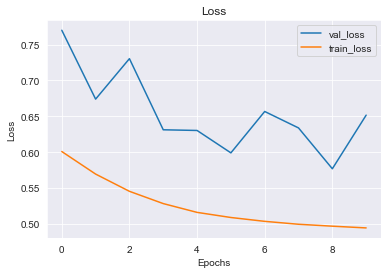

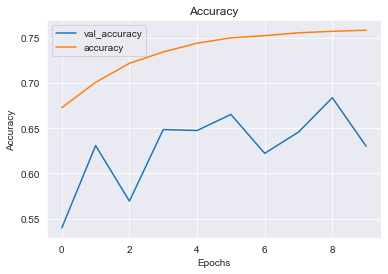

In [1834]:
visualize_training_results(results_nn_base)

In [ ]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

Add l1 regulaizer

In [1841]:
from keras.regularizers import l1, l2

In [1842]:
# establish the regularization strength of lambda
reg_l1 = l1(3e-3) # 1e-5 to .1

In [1843]:
x_resampled_clean = np.asarray(x_resampled).astype(np.float32)
x_test_processed_clean = np.asarray(x_test_processed).astype(np.float32)
y_resampled_clean = np.asarray(y_resampled).astype(np.float32)
y_test_clean = np.asarray(y_test).astype(np.float32)

In [1844]:
model_nn_l1 = Sequential()
model_nn_l1.add(Dense(16, input_shape=(99,), activation='relu')),
model_nn_l1.add(Dense(32, activation='relu')),
model_nn_l1.add(Dropout(0.2)),
model_nn_l1.add(Dense(32, 
                     activation='relu',
                     kernel_regularizer = reg_l1)),
model_nn_l1.add(Dense(1, activation='sigmoid'))
#Compile model
model_nn_l1.compile(
                loss='binary_crossentropy', 
                optimizer= keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
model_nn_l1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                1600      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 3,233
Trainable params: 3,233
Non-trainable params: 0
_________________________________________________________________


In [1845]:
results_nn_l1 = model_nn_l1.fit(
                    x=x_resampled_clean, 
                    y=y_resampled_clean, 
                    epochs=10, 
                    batch_size=5, 
                    validation_split=0.15,
                    callbacks = [earlystopper])


Epoch 1/10
28398/28398 [==============================] - 83s 3ms/step - loss: 0.6192 - tp: 46317.0000 - fp: 18580.0000 - tn: 64943.0000 - fn: 37206.0000 - accuracy: 0.6660 - precision: 0.7137 - recall: 0.5545 - auc: 0.7358 - prc: 0.7505 - val_loss: 0.6784 - val_tp: 15834.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 9223.0000 - val_accuracy: 0.6319 - val_precision: 1.0000 - val_recall: 0.6319 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 2/10
28398/28398 [==============================] - 81s 3ms/step - loss: 0.5677 - tp: 35309.0000 - fp: 17578.0000 - tn: 65945.0000 - fn: 23157.0000 - accuracy: 0.7131 - precision: 0.6676 - recall: 0.6039 - auc: 0.7717 - prc: 0.6845 - val_loss: 0.6956 - val_tp: 15453.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 9604.0000 - val_accuracy: 0.6167 - val_precision: 1.0000 - val_recall: 0.6167 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 3/10
28398/28398 [==============================] - 81s 3ms/step - loss: 0.5501 - tp: 36331.0000 -

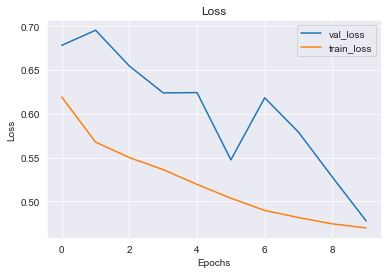

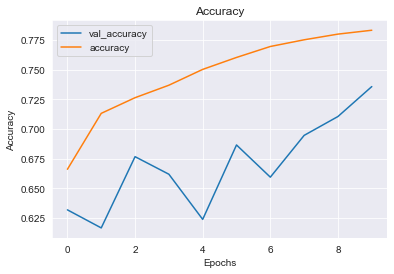

In [1846]:
visualize_training_results(results_nn_l1)